In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


import numpy as np

def sigmoid(x):
 return 1/(1 + np.exp(-x))

In [9]:



pqr_agrs_100_30k = pd.read_csv('../../runs/cass_ALL_520/scalarOut/merge_LP_mcts_chess.csv', header = 2)

In [10]:
pqr_agrs_100_30k

,wall_time,step,run/total_games,run/total_wins,run/total_reward,run/length
0,1.621531e+09,108,2.0,0.0,-1.0,108.0
1,1.621531e+09,155,4.0,0.0,-1.0,47.0
2,1.621531e+09,190,6.0,1.0,1.0,34.0
3,1.621531e+09,291,8.0,1.0,-1.0,101.0
4,1.621531e+09,389,10.0,1.0,-1.0,98.0
...,...,...,...,...,...,...
6633,1.621550e+09,23728,546.0,132.0,-1.0,110.0
6634,1.621550e+09,23777,548.0,133.0,1.0,48.0
6635,1.621550e+09,23848,550.0,134.0,1.0,70.0
6636,1.621550e+09,23896,552.0,135.0,1.0,47.0


In [11]:
pqr_agrs_100_30k.sort_values(by='step', inplace=True)

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_agrs_100_30k.iterrows():
    step = row['step']

    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']


# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).std()
rolling

df_av_at_step['reward'] = (rolling['reward']/2) + .5
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
eval_pooledThirds = df_av_at_step
eval_pooledThirds


,step,reward,length,reward_se,length_se
0,8.0,0.000000,8.000000,0.000000,0.000000
1,84.0,0.000000,46.038000,0.000000,53.740115
2,108.0,0.000000,66.733322,0.000000,52.188107
3,123.0,0.000000,80.842219,0.000000,51.058630
4,130.0,0.200801,90.512340,0.895768,49.178324
...,...,...,...,...,...
5479,100019.0,0.538765,92.812022,0.992774,39.328259
5480,100031.0,0.537689,92.776433,0.992949,39.297008
5481,100040.0,0.536614,92.890768,0.993120,39.340888
5482,100094.0,0.535542,92.952925,0.993285,39.326135


In [12]:

pqr_agrs_100_30k = pd.read_csv('../../runs/cass_ALL_520/scalarOut/merge_noLP_mcts_chess.csv', header = 2)

In [13]:
pqr_agrs_100_30k

,wall_time,step,run/total_games,run/total_wins,run/total_reward,run/length
0,1.621549e+09,0,1.0,1.0,1.0,8.0
1,1.621549e+09,8,3.0,1.0,-1.0,126.0
2,1.621549e+09,134,5.0,1.0,-1.0,69.0
3,1.621549e+09,203,7.0,2.0,1.0,164.0
4,1.621549e+09,367,9.0,3.0,1.0,130.0
...,...,...,...,...,...,...
6633,1.621548e+09,99640,2109.0,487.0,1.0,183.0
6634,1.621548e+09,99823,2111.0,487.0,-1.0,8.0
6635,1.621548e+09,99831,2113.0,487.0,-1.0,99.0
6636,1.621548e+09,99930,2115.0,487.0,-1.0,39.0


In [14]:
pqr_agrs_100_30k.sort_values(by='step', inplace=True)

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_agrs_100_30k.iterrows():
    step = row['step']

    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']


# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).std()
rolling

# center at 50 and divide space by 2 to put between 0 and 1
df_av_at_step['reward'] = (rolling['reward']/2) + .5
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
eval_pooled = df_av_at_step
eval_pooled



,step,reward,length,reward_se,length_se
0,0.0,0.571429,102.571429,0.000000,0.000000
1,8.0,0.285429,114.297429,0.808122,16.566502
2,84.0,0.524096,107.518083,1.003843,16.569643
3,108.0,0.643429,92.343143,0.947664,33.170666
4,123.0,0.514228,112.555121,1.002532,53.449375
...,...,...,...,...,...
5474,99930.0,0.462792,93.495893,0.992939,39.166135
5475,99956.0,0.463866,93.458938,0.993108,39.135713
5476,99969.0,0.464937,93.372105,0.993271,39.144778
5477,99970.0,0.466006,93.433301,0.993429,39.129586


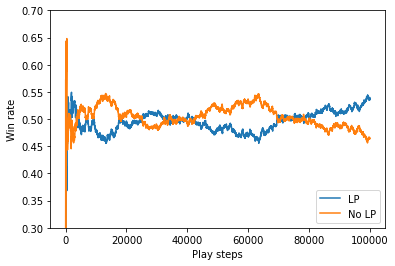

In [15]:
import itertools
marker = itertools.cycle((',', '+', 'o', '*'))


fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')
#sns.lineplot(x="step", y="reward", data=eval_LP3_DFA ,ax=axs, ci=99, )
col=sns.color_palette("tab10")
#sns.lineplot(x="step", y="reward", data=eval_LP3_DFA,ax=axs, ci=99,
 #            )
sns.lineplot(x="step", y="reward", data=eval_pooledThirds,ax=axs, ci=99,
             )

sns.lineplot(x="step", y="reward", data=eval_pooled,ax=axs, ci=99,
             )
#axs.fill_between(x=eval_pooledThirds["step"], y1=eval_pooledThirds["reward"] + eval_pooledThirds["reward_se"],
#                y2=eval_pooledThirds["reward"] - eval_pooledThirds["reward_se"], alpha=.5)
#axs.fill_between(x=eval_pooled["step"], y1=eval_pooled["reward"] + eval_pooled["reward_se"],
#                 y2=eval_pooled["reward"] - eval_pooled["reward_se"], alpha=.5)
#axs.fill_between(x=df_no_lp_no_dfa["step"], y1=df_no_lp_no_dfa["reward"] + df_no_lp_no_dfa["reward_se"],
#                 y2=df_no_lp_no_dfa["reward"] - df_no_lp_no_dfa["reward_se"], alpha=.5)
axs.set(xlabel='Play steps', ylabel='Win rate', ylim=(0.3, 0.7))
#plt.title('Go - Evaluation post 100k steps self-play training per checkpoint')

axs.legend(['LP','No LP'], loc=4)


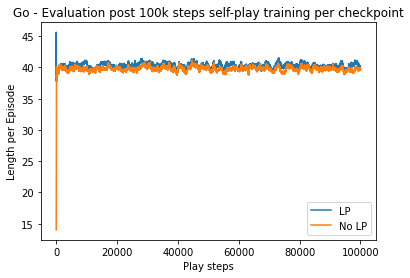

In [9]:
fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')

sns.lineplot(x="step", y="length", data=eval_pooled,ax=axs, ci=99,
             )

sns.lineplot(x="step", y="length", data=eval_pooledThirds,ax=axs, ci=99,
             )
axs.set(xlabel='Play steps', ylabel='Length per Episode')
plt.title('Go - Evaluation post 100k steps self-play training per checkpoint')

axs.legend(['LP', 'No LP'], loc=4)

